<a href="https://colab.research.google.com/github/vadaliah/CS5260/blob/master/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq ipdb
import ipdb

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My\ Drive/Colab\ Notebooks/hw1

/content/gdrive/My Drive/Colab Notebooks/hw1


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load Food Truck Data
food_truck_regr_data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/hw1/food_truck_data.txt',delimiter=',')

In [5]:
# make up some initial thetas
theta_0 = 0.22
theta_1 = 0.86

In [7]:
# get example 0
x1, y = food_truck_regr_data[0]


In [8]:
# use formula for linear regression to get output
y_hat = theta_0 + theta_1 * x1

In [9]:
# calculate basic error
error = y_hat - y
error

-12.117313999999999

In [12]:
# calculate cost
cost = 0.5 * (error ** 2)


In [11]:
# new parameter - learning rate
alpha = 5e-3
alpha

0.005

In [13]:
# calculate update for theta 0
theta_0_new = theta_0 - alpha * (error) * 1
theta_0_new

0.28058657

In [14]:
# calculate update for theta 1
theta_1_new = theta_1 - alpha * (error) * x1
theta_1_new

1.230190001357

In [15]:
# do the update
theta_0 = theta_0_new
theta_1 = theta_1_new

In [16]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [17]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iterat
    '''
    
    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = er
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error

In [20]:
# set initial parameters
thetas = [3.44, 2.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 100
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(food_truck_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = abs(epoch_error)

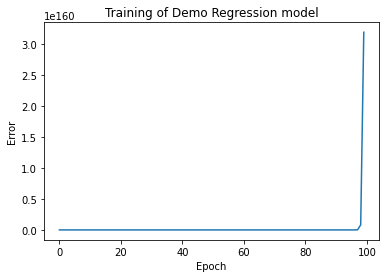

In [21]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

In [22]:
housing_price_regr_data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/hw1/housing_price_data.txt',delimiter=',')
# housing_price_regr_data

In [27]:
def calculate_single_forward_multivariable(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]
    theta_2 = thetas[2]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    x2 = train_ex[1]
   
    y = train_ex[2]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1+ theta_2*x2
    error = y_hat - y
    cost = 0.5 * (error ** 2)
    # print(x1,x2,error)

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1,error * x2])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [28]:
def gradient_descent_multivariable(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from 
    '''
    
    total_error = 0
    overall_gradients = np.zeros(3)

    # compute the summation of gradients across all training 
    for ex in training_data:
        gradients = calculate_single_forward_multivariable(thetas, ex)
        # gradients[0] is the error term (gradients[0] = erro
        total_error += gradients[0]
        overall_gradients+=  gradients

    # update thetas
    theta_0, theta_1,theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]

    return thetas, total_error

In [29]:
# set initial parameters
thetas = [3.44, 2.13, 1.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 20
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent_multivariable(housing_price_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

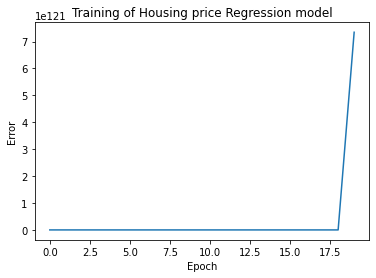

In [30]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Housing price Regression model');

In [31]:
# Using MinMaxScaler to scale the features
from sklearn.preprocessing import MinMaxScaler

In [34]:
def gradient_descent_scaling(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from 
    '''
    
    total_error = 0
    overall_gradients = np.zeros(3)
# define min max scaler
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
# transform data
    scaled_data = minmax_scaler.fit_transform(training_data)
    # print(scaled_data)

    # compute the summation of gradients across all training 
  

    for ex in scaled_data:
        gradients = calculate_single_forward_multivariable(thetas, ex)
        # gradients[0] is the error term (gradients[0] = erro
        total_error += gradients[0]
        overall_gradients+=  gradients

    # update thetas
    theta_0, theta_1,theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]

    return thetas, total_error

In [35]:
# set initial parameters
thetas = [3.44, 2.13, 1.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 20
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent_scaling(housing_price_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

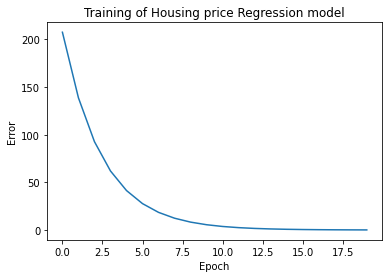

In [36]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Housing price Regression model');